In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warningsgs
warnings.simplefilter('ignore')

<div class='alert-info alert'>
<h3>Cargamos nuestros datos.</h3>
</div>

In [2]:
movies = pd.read_csv('./datasets/peliculas.csv', encoding='utf-8')
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [3]:
movies.shape

(5043, 19)

In [4]:
movies.columns[:]

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [5]:
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [6]:
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [7]:
linea10 = movies.loc[10,:]
linea10.head()

movie_title     Batman v Superman: Dawn of Justice 
title_year                                     2016
color                                         Color
aspect_ratio                                   2.35
duration                                        183
Name: 10, dtype: object

<div class='alert alert-info'>
<h3>Inspección de datos.</h3>
</div>

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [9]:
# Columnas númericas y columnas de texto
(movies.dtypes == float) | (movies.dtypes == int) 

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [10]:
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [11]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num = [x for x in num.index if num[x] == True]
num

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [12]:
obj = movies.dtypes == object
obj = [x for x in obj.index if obj[x] == True]
obj

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [13]:
movies_num = movies[num]
movies_num.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


<div class="alert alert-info">
  <h3>Estadísticas de las columnas numéricas.</h3>
</div>

In [14]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


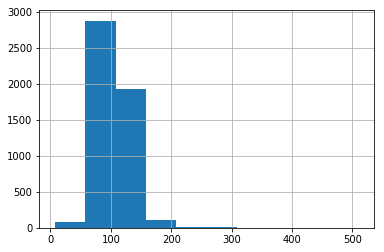

In [15]:
movies_num['duration'].hist()

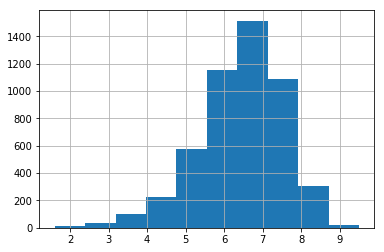

In [16]:
movies_num['imdb_score'].hist()

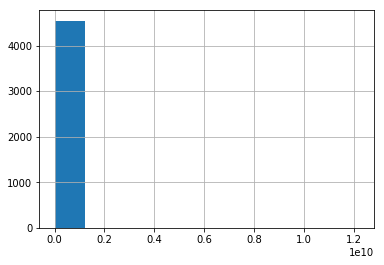

In [17]:
movies_num['budget'].hist()

<div class='alert alert-warning'>
Veamos que esta columna tiene un comportamiento anomalo, necesitamos limpiar los datos.  Podemos hacerlo usando la tecnica **boolean filtering**
</div>

In [18]:
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [19]:
# Tenemos 6 películas problematicas.
mask = movies_num['budget'] > 1e9
movies[mask] # Palículas con presupuesto anómalo

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [20]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: budget, dtype: bool

Estas películas orientales tienen un presupuesto tan alto porque no esta medido en dolares sino en su moneda local.

<div class="alert alert-info">
  <h3>Limpiando los datos.</h3>
</div>

In [21]:
financials = pd.read_csv('./datasets/numbers.csv')
financials = financials[['movie_title', 'production_budget', 'worldwide_gross']]
print('shape financials: ', financials.shape)
print('shape movies: ', movies.shape)

shape financials:  (4341, 3)
shape movies:  (5043, 19)


Al unir los dos dataSets, perderemos 702 datos. No es lo ideal, pero es mejor tener menos datos de calidad, que muchos sucios, pero como no es un porcentaje grande de datos que perdemos, no importa mucho.

<div class='alert alert-warning'>
Como llave primaria para unir los dataframes usaremos **movie_title**, pero el dataframe numérico de las películas no tiene esta columna, así que debemos agregarla.
</div>

In [22]:
# Por defecto la concatenación se hace línea a línea.
# Para hacerla columna a columna ponemos axis=1
movies_num = pd.concat([movies_num, movies['movie_title']], axis=1)
movies_num.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...


In [23]:
moviesV2 = pd.merge(financials, movies_num, on='movie_title', how='left')
moviesV2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [24]:
moviesV2.shape

(4385, 11)

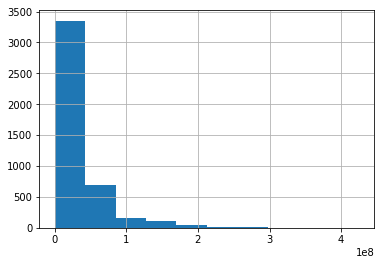

In [25]:
moviesV2['production_budget'].hist()

<div class='alert alert-info'>
<h3>Datos faltantes nulos o NaN</h3>
</div>

In [26]:
# Columna a columna cuenta cuantos false y true hay.
moviesV2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [27]:
# Contamos valores nulos.
(moviesV2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [28]:
aviable = ((moviesV2 != 0) & (moviesV2.notnull()))
aviable.all(axis = 1).value_counts() # axis = 1, se mueve por columnas

True     3408
False     977
dtype: int64

Tenemos 977 lineas con valores falsos. Debemos tener la variable objetivo sin valores nulos o ceros. Vamos a limpiarla. (worldwide_gross)

In [29]:
mask = aviable['worldwide_gross']
moviesV2 = moviesV2[mask] # Dejamos solo los casos donde no tiene valores nulos.
print('Shape moviesV2', moviesV2.shape)
((moviesV2 != 0) & (moviesV2.notnull())).worldwide_gross.value_counts()


Shape moviesV2 (4104, 11)


True    4104
Name: worldwide_gross, dtype: int64

Vemos ahora que no tenemos valores nulos en nuestra variable objetivo.

<div class='alert alert-warning'>
En el caso de que algun feature tenga datos nulos, pero no sea nuestra variable objetivo, podemos lidiar con los datos faltantes **reemplazando estos datos por otros que sean manejables** y no afecten la calidad de las predicciones. La estrategia es usar la media de todos los ejemplos de la feature.
</div>

In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis = 1)

In [31]:
# Sacamos columnas no numéricas y duplicadas.
moviesV2 = moviesV2.drop('movie_title', axis = 1)
moviesV2 = moviesV2.drop('duration.1', axis = 1)
moviesV2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [32]:
# Reemplazamos valores nulos.
values = imputer.fit_transform(moviesV2)
X = pd.DataFrame(values)
X.columns = moviesV2.columns
X.index = moviesV2.index
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1,5.911656e+08
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5,4.481306e+08


Ahora tenemos un dataframe limpio y listo para trabajar.

In [33]:
X.to_csv('./datasets/intermediate_result.csv', index = False)

<div class='alert alert-info'>
<h3>El objeto estimador de Scikit-Learn</h3>
</div>

In [86]:
X = pd.read_csv('./datasets/intermediate_result.csv')
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1,5.911656e+08
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5,4.481306e+08


In [87]:
Y = X['worldwide_gross']  # variable objetivo
X = X.drop('worldwide_gross', axis=1)
X = X.drop('gross', axis=1)

In [88]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.4)
print('len X: ', len(X))
print('len xtrain: ', len(xtrain))
print('len xtest: ', len(xtest))

len X:  4104
len xtrain:  2462
len xtest:  1642


In [89]:
from sklearn.linear_model import Lasso

model = Lasso()
# entrenamos el modelo
model.fit(xtrain, ytrain)

/home/ruben/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

([array([768., 684., 118.,  43.,  22.,   6.,   1.,   0.,   0.,   0.]),
  array([977., 483., 114.,  31.,  18.,  10.,   7.,   1.,   0.,   1.])],
 array([-1.31452379e+08,  4.87256614e+07,  2.28903702e+08,  4.09081742e+08,
         5.89259783e+08,  7.69437823e+08,  9.49615863e+08,  1.12979390e+09,
         1.30997194e+09,  1.49014998e+09,  1.67032802e+09]),
 <a list of 2 Lists of Patches objects>)

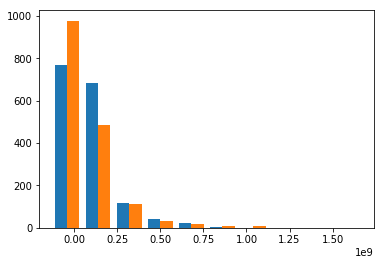

In [90]:
# Obtengamos nuestras predicciones.
predicted = model.predict(xtest)

plt.hist([predicted, ytest])

<div class='alert alert-warning'>
Evaluemos el comportamiento del modelo.
</div>

Usando el **score** podemos evaluar que tan bueno es nuestro modelo. Si esta cerca de 0, significa que el modelo predice lo mismo que tomar la media de los puntos. Si esta cerca de 1, significa que tenemos un modelo muy bueno.

In [91]:
model.score(xtest, ytest)

0.542127840847408

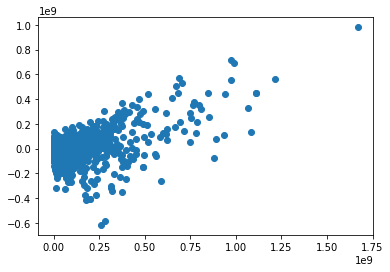

In [92]:
# Los residuales son las diferencias entre la predicción y el valor real.
residuals = ytest - predicted

# En fución de los datos de entrada, que tanto error hay
plt.scatter(ytest, residuals)

Esos errores son absolutos, estan en las unidades de la variable (dolares).  Veamos ahora esos errores en escala relativa (procentaje).

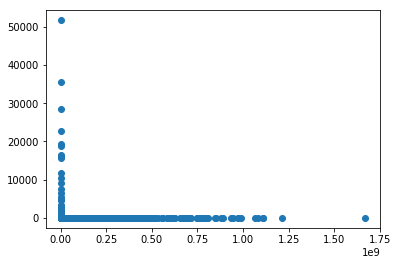

In [93]:
ap_residuals = np.abs(residuals)/ytest  # valores absolutos
plt.scatter(ytest, ap_residuals)

Escala logaritmica para eje y

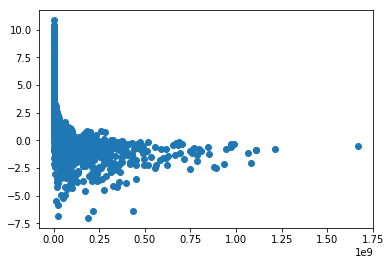

In [94]:
lap_residuals = np.log(ap_residuals)
plt.scatter(ytest, lap_residuals)

[-2, 0, 0, 1]

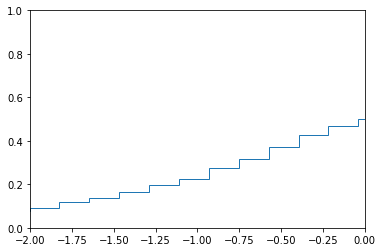

In [95]:
# Evaluemos nuestros errores, con la función acumulativa de error.
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2, 0, 0, 1])

<div class='alert alert-info'>
<h3>Diseño de features.</h3>
</div>

In [96]:
# matriz de correlación.
X.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.108014,0.111093,0.113107,0.236820,0.198268,0.033154
title_year,0.108014,1.000000,0.833058,0.833214,-0.013226,0.041345,0.021057
aspect_ratio,0.111093,0.833058,1.000000,0.980641,-0.009069,0.052507,0.009654
duration,0.113107,0.833214,0.980641,1.000000,-0.006138,0.048788,0.013964
cast_total_facebook_likes,0.236820,-0.013226,-0.009069,-0.006138,1.000000,0.035872,0.096663
budget,0.198268,0.041345,0.052507,0.048788,0.035872,1.000000,0.018949
imdb_score,0.033154,0.021057,0.009654,0.013964,0.096663,0.018949,1.000000


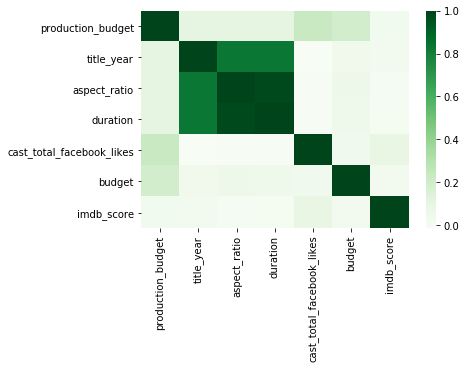

In [97]:
sb.heatmap(X.corr(), cmap="Greens")

Como en general la gráfica es blanca, nuestra que las features son bastante independientes.

In [98]:
model.coef_ # parametros de la regresión lineal

array([ 3.18685954e+00, -1.17340299e+00, -2.01834816e-01,  3.19719502e+00,
        2.85671398e+02, -8.86860730e-03,  2.71945963e+07])

In [99]:
var = np.floor(np.log10(np.abs(model.coef_))) # ordenes de magnitud

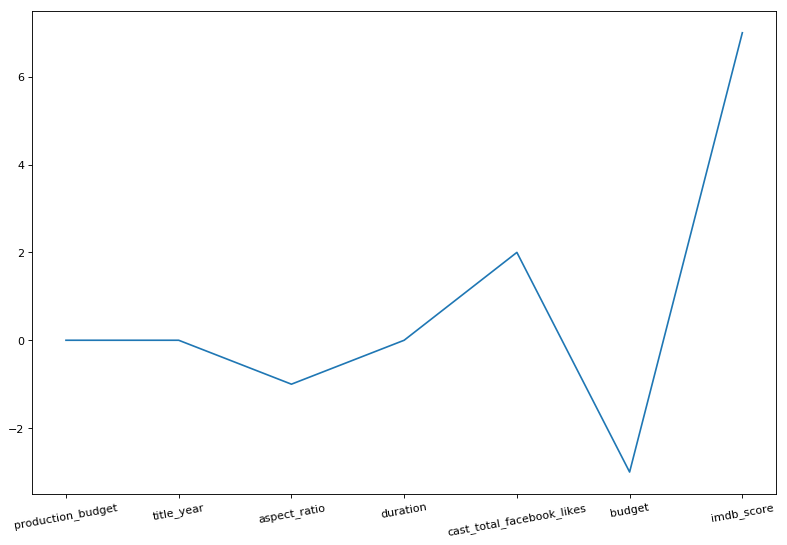

In [100]:
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns), rotation=10);

Podemos ver la importancia de cada coeficien en la regresión lineal

### Ahora veamos la correlación entre las variables

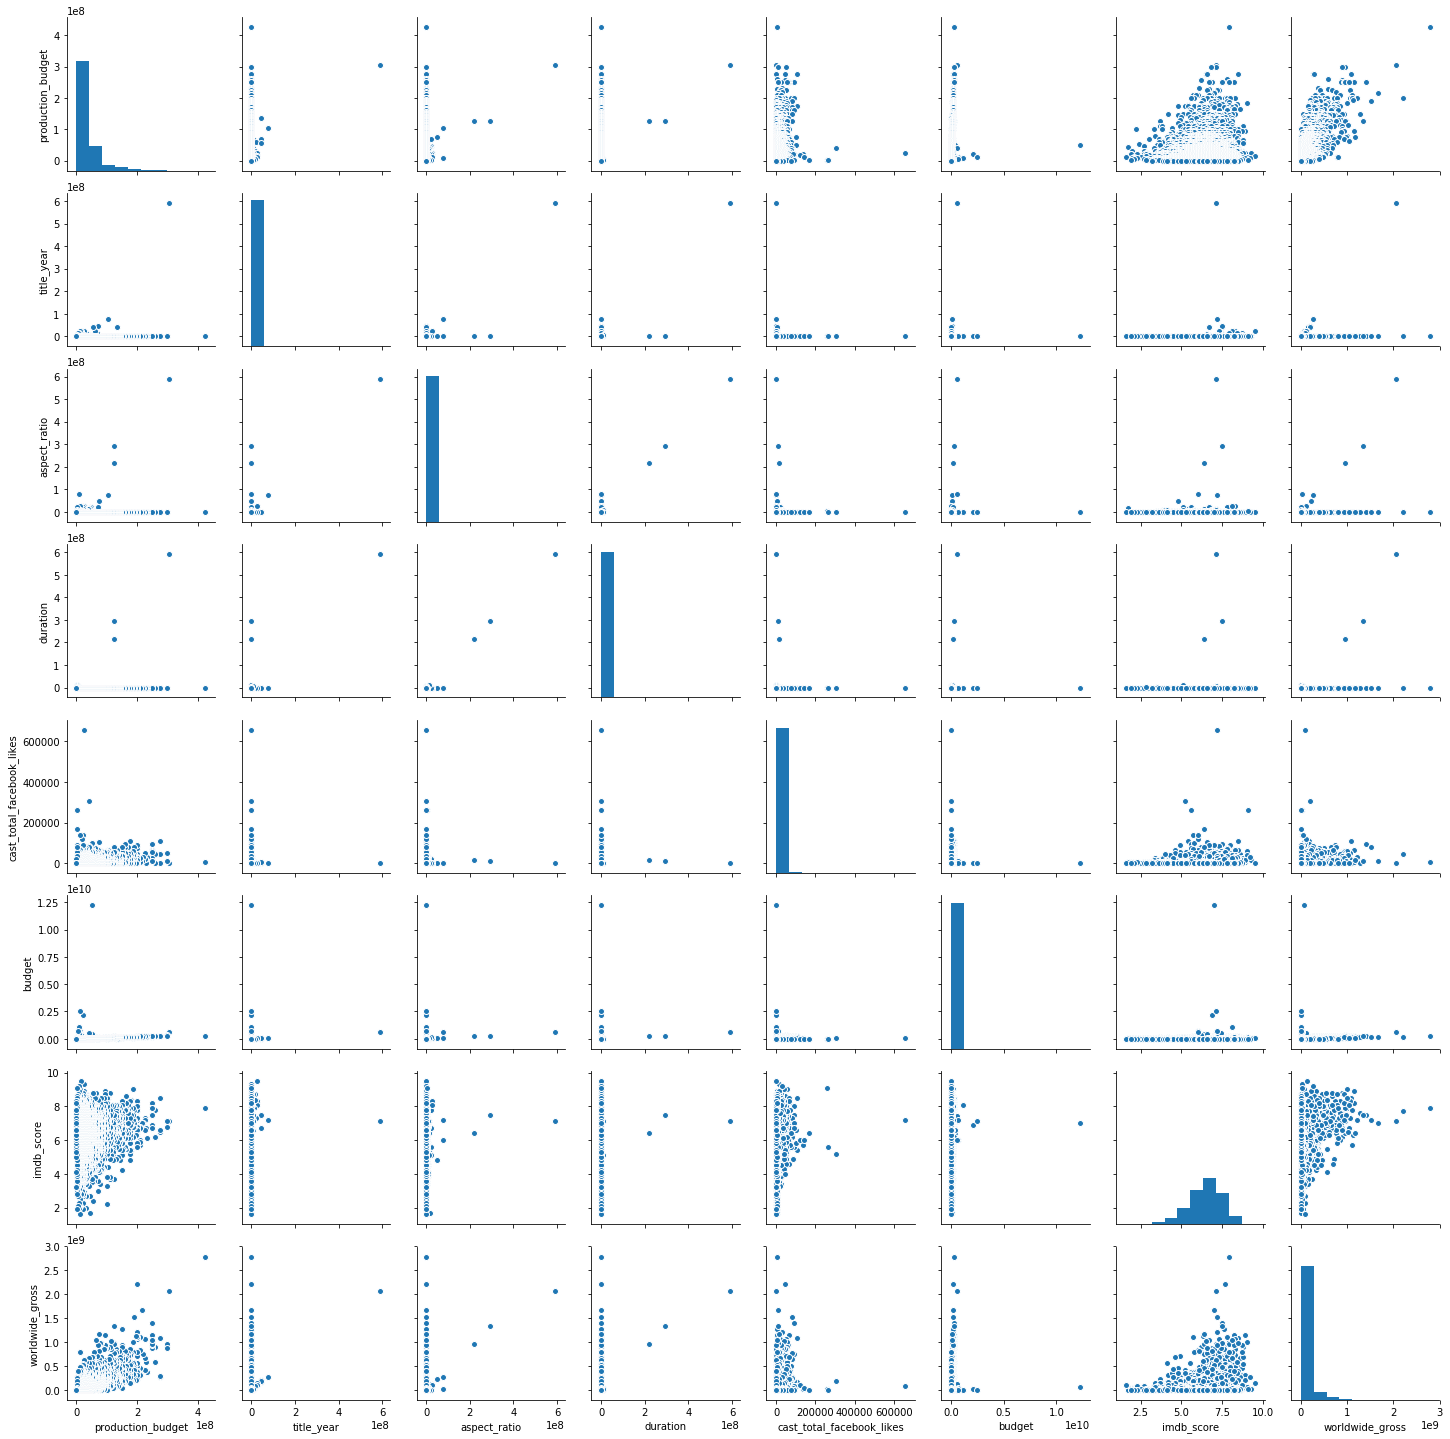

In [101]:
Z = pd.concat([X,Y], axis=1)
sb.pairplot(Z)

En la diagonal tenemos la forma en la que cada feature se distribuye, y los scater
muestran la correlacion entre las variables. Diagonal seria correlación perfecta. En la ultima fila tenemos la variable objetivo. Vemos que solo se corelaciona con el **production_budget** y con el **gross**

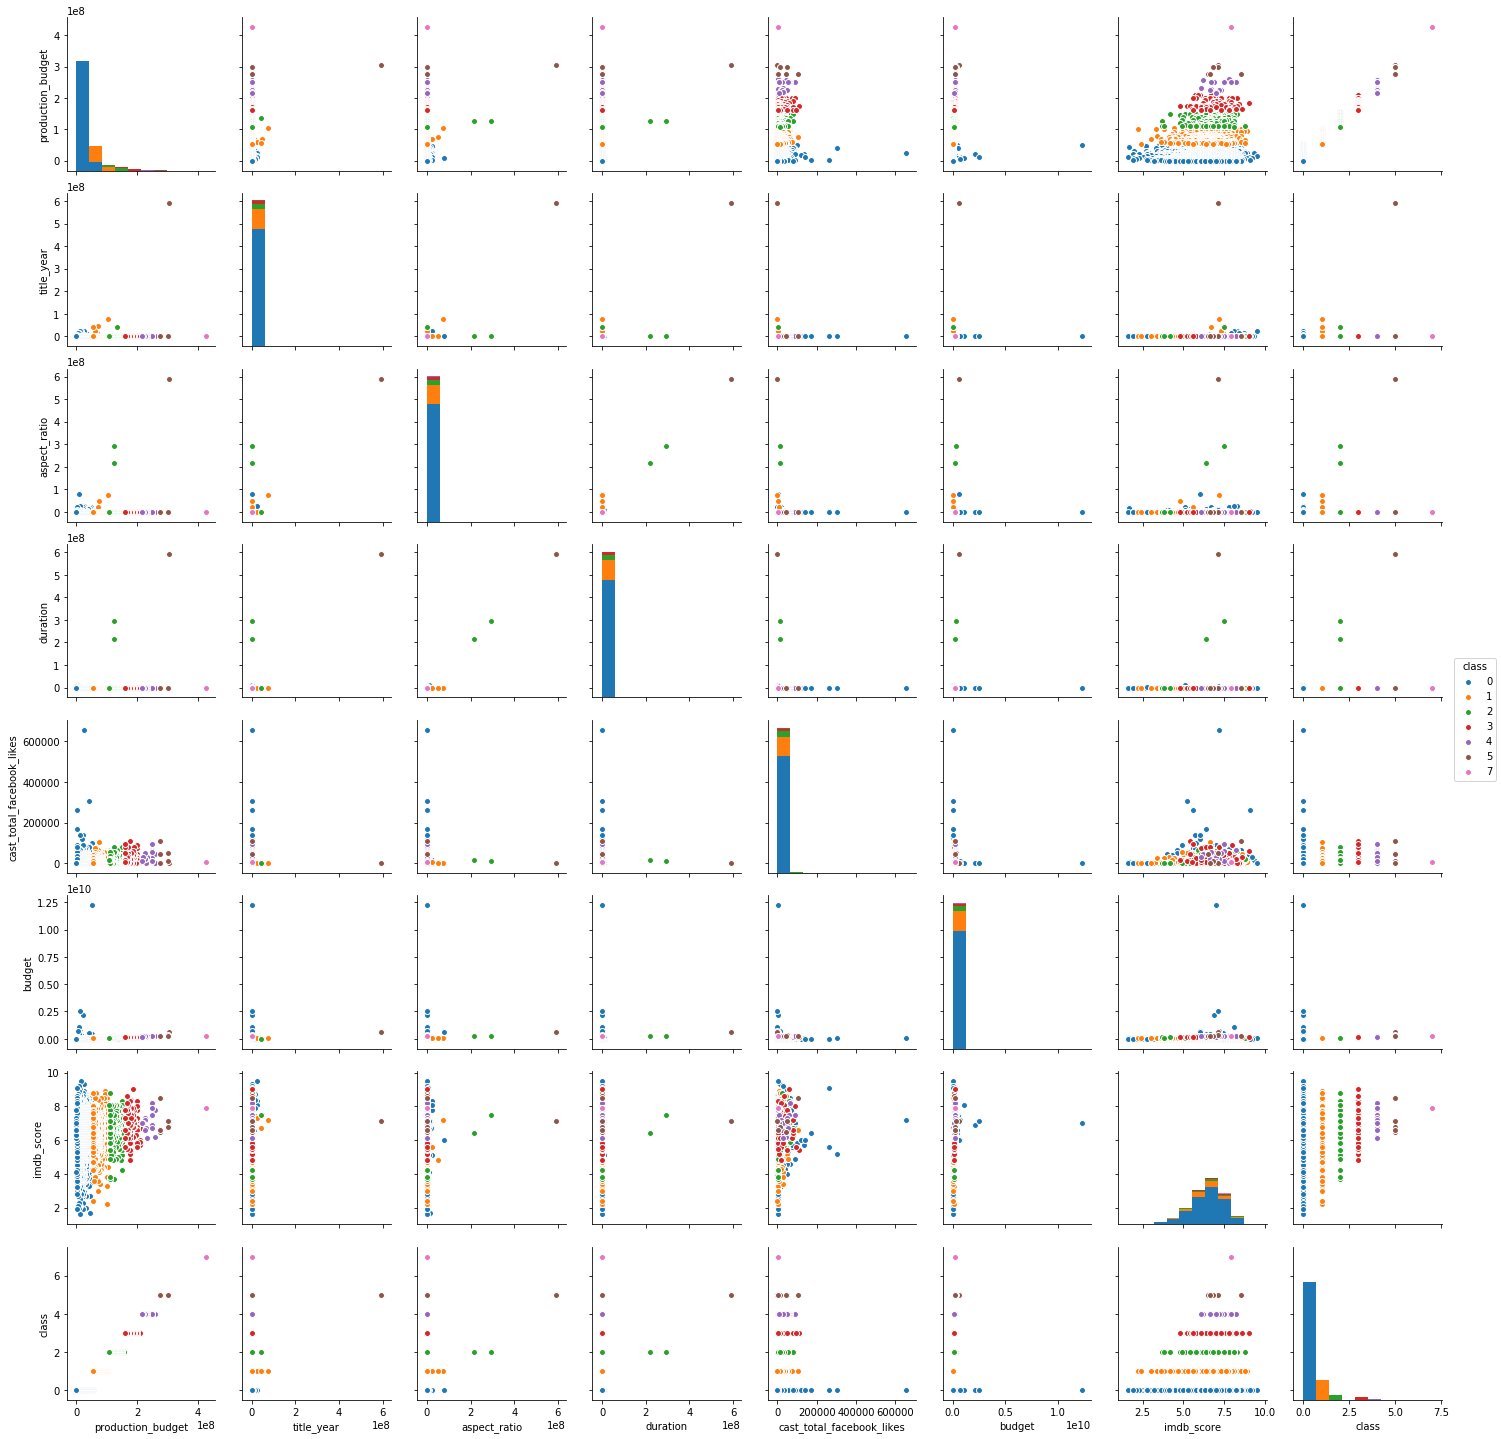

In [102]:
# separo mis datos en 8 contenedores, entre mas alta la clase, mas costosa 
# es la película.
clase = pd.cut(X['production_budget'], 8).cat.codes.rename('class')
z2 = pd.concat([X,clase], axis=1)
sb.pairplot(z2, hue='class')  # hue => para pintar segun los valores de class

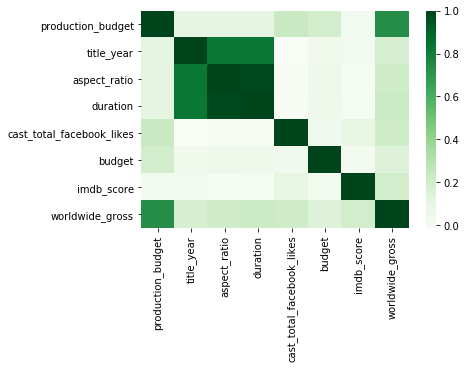

In [103]:
# incluyamos la variable objetivo en nuestro estudio.
z3 = pd.concat([X,Y], axis=1)
sb.heatmap(z3.corr(), cmap='Greens')

### Selección automatica de features

In [104]:
# selecciona las k mejores
from sklearn.feature_selection import SelectKBest
# metrica del seleccionador
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,Y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7fbfdb1df158>)

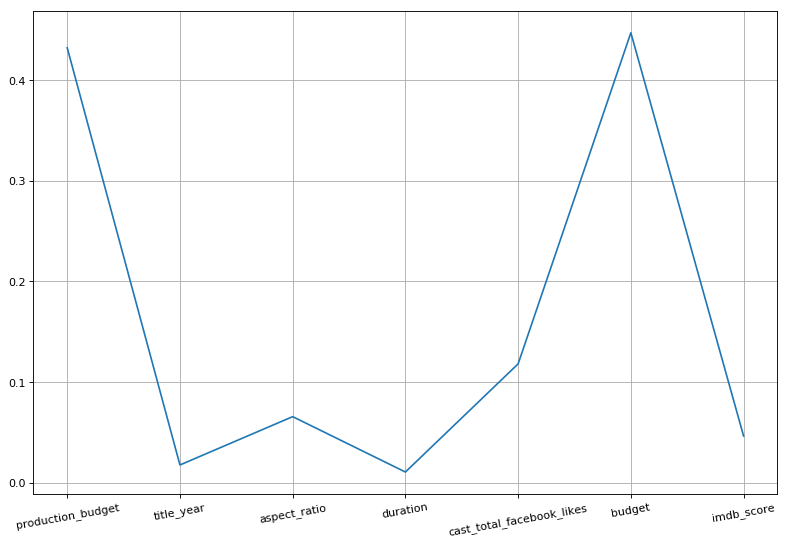

In [106]:
# Que tanta infor aporta cada feature
scores = selector.scores_
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns), rotation=10);
plt.grid(True)

In [109]:
# nos vamos a quedat con las features que mejor score han tenido
X2 = [['production_budget', 'title_year', 'duration', 'cast_total_facebook_likes', 'imdb_score']]
X3 = [['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
col2 = ['production_budget', 'title_year', 'duration', 'cast_total_facebook_likes', 'imdb_score']
col3 = ['production_budget', 'cast_total_facebook_likes', 'imdb_score']

x2train, x2test, y2train, y2test = xtrain[col2], xtest[col2], ytrain, ytest
x3train, x3test, y3train, y3test = xtrain[col3], xtest[col3], ytrain, ytest

In [112]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(xtrain, ytrain)
model2.fit(x2train, y2train)
model3.fit(x3train, y3train)

/home/ruben/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
print('model1', model1.score(xtest, ytest))
print('model2', model2.score(x2test, y2test))
print('model3', model3.score(x3test, y3test))

model1 0.5924954385324217
model2 0.5925725130184458
model3 0.591774909333256


No fue util reducir la dimencionalidad. :(

<div class='alert alert-info'>
<h3> Creación de features</h3>
</div>

## Escalamiento de los datos
La **estandarización** convierte la variable en otra con distribución gaussiana y desviación estandar 1.

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain, ytrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [119]:
scaler.mean_ # promedios de cada feature

array([3.36877975e+07, 2.76498556e+05, 5.09286257e+05, 3.64616221e+05,
       1.04734886e+04, 4.01499384e+07, 6.44385965e+00])

In [121]:
scaler.scale_ # desviación estandar de cada feature

array([4.09072824e+07, 1.07691877e+07, 1.26733075e+07, 1.25188019e+07,
       1.98442017e+04, 2.32609166e+08, 1.09058511e+00])

In [122]:
scaler.transform(xtrain)

array([[-7.25733800e-01, -2.54879535e-02, -4.01855560e-02, ...,
        -4.63232976e-01, -1.55410636e-01, -4.06992216e-01],
       [-1.39041196e-01, -2.54885106e-02, -4.01855955e-02, ...,
        -3.56451155e-01, -5.22332742e-02,  4.18252870e-01],
       [-9.01501455e-02, -2.54881392e-02, -4.01855955e-02, ...,
        -2.18526736e-01, -1.03613056e-01, -1.23223730e+00],
       ...,
       [ 2.03196156e-01, -2.54899035e-02, -4.01855955e-02, ...,
         1.90005696e-01,  7.95351985e-03,  3.26558971e-01],
       [ 1.13212611e+00, -2.54884178e-02, -4.01855560e-02, ...,
        -5.20126169e-01, -6.44593588e-04,  1.24349796e+00],
       [-7.01288275e-01, -2.54888821e-02, -4.01855955e-02, ...,
        -3.77414457e-01, -1.51111579e-01, -1.69070679e+00]])

In [123]:
# reescalemos los datos
xtrainScaled, xtestScaled = (scaler.transform(xtrain), scaler.transform(xtest))

In [127]:
model = Lasso()
modelScaled = Lasso()

model.fit(xtrain, ytrain)
modelScaled.fit(xtrainScaled, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
print('modelo normal: ',model.score(xtest, ytest))
print('modelo escalado: ',modelScaled.score(xtestScaled, ytest))

modelo normal:  0.5922187785558423
modelo escalado:  0.5922187797189719


Vemos que el escalamiento no tubo ningun efecto aquí, ya que la regresión no es sencible a los escalamientos, pero los clasificadore si.

<div class='alert alert-info'>
<h3>Creación de features automaticamentes</h3>
</div>

In [130]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)
newX = transformer.fit_transform(X)
print(X.shape)
print(newX.shape)

(4104, 7)
(4104, 36)
